# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
import seaborn as sns
## add any other additional packages that you need. You are free to use any packages for vizualization.

from pathlib import Path
from dotenv import load_dotenv
import os

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
dotenv_path = Path('credentials.env')
load_dotenv(dotenv_path=dotenv_path)

aws_credentials = {"key" : os.getenv("aws_access_key_id"),
                   "secret": os.getenv("aws_secret_access_key"),
                   "token": os.getenv("aws_session_token")}

In [3]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
# aws_credentials = {"key": "","secret": "","token":""}
df = pd.read_csv("s3://mds-s3-06/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
## Use your ML skills to get from step 1 to step 6

#rename "observed_rainfall" ro "Observed"
df.rename(columns={"observed_rainfall": "Observed"}, inplace=True)

#Drop rows with nans. 
df = df.dropna()

#Split the data into train (80%) and test (20%) portions with random_state=123
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

X_train = train_df.drop(columns=["Observed"])
y_train = train_df["Observed"]

X_test = test_df.drop(columns=["Observed"])
y_test = test_df["Observed"]

In [5]:
#EDA
train_df.describe()

ACCESS-CM2  ACCESS-ESM1-5  AWI-ESM-1-1-LR   BCC-CSM2-MR  \
count  36791.000000   36791.000000    3.679100e+04  3.679100e+04   
mean       2.429419       2.938955    3.716329e+00  2.203086e+00   
std        6.791374       7.048794    7.280859e+00  6.518224e+00   
min        0.000000       0.000000    9.161142e-14  4.211430e-24   
25%        0.054108       0.021248    2.961787e-02  5.089918e-04   
50%        0.192980       0.492758    5.923147e-01  9.644146e-02   
75%        1.445456       2.398539    3.601697e+00  1.318940e+00   
max      149.967634     157.605713    8.946575e+01  1.344652e+02   

           BCC-ESM1  CMCC-CM2-HR4  CMCC-CM2-SR5     CMCC-ESM2       CanESM5  \
count  3.679100e+04  36791.000000  3.679100e+04  3.679100e+04  36791.000000   
mean   2.748441e+00      3.092784  3.575203e+00  3.489756e+00      2.879339   
std    5.997439e+00      6.459254  7.353451e+00  7.039201e+00      6.898890   
min    1.091904e-24      0.000000 -4.503054e-17 -3.186177e-19      0.000000   
25%    2.381995e-03      0.138315  8.899328e-02  9.271159e-02      0.022493   
50%    2.986511e-01      0.633548  8.278889e-01  8.486242e-01      0.337613   
75%    2.477893e+00      3.182630  3.727703e+00  3.629963e+00      2.558854   
max    8.713472e+01    124.952390  1.401478e+02  1.375916e+02    135.569753   

       EC-Earth3-Veg-LR  ...  MPI-ESM-1-2-HAM  MPI-ESM1-2-HR  MPI-ESM1-2-LR  \
count      3.679100e+04  ...     3.679100e+04   3.679100e+04   3.679100e+04   
mean       2.565430e+00  ...     3.213535e+00   1.299377e+00   2.041242e+00   
std        5.732742e+00  ...     6.979341e+00   4.890737e+00   5.347782e+00   
min       -9.934637e-19  ...     3.315622e-13   1.088608e-13   9.155419e-14   
25%        1.201630e-02  ...     1.169275e-04   1.270013e-13   1.358104e-13   
50%        4.296779e-01  ...     2.081838e-01   1.579151e-03   1.140358e-01   
75%        2.295852e+00  ...     2.699071e+00   3.465456e-01   1.192421e+00   
max        9.642382e+01  ...     9.306766e+01   1.095008e+02   7.484368e+01   

         MRI-ESM2-0         NESM3    NorESM2-LM    NorESM2-MM   SAM0-UNICON  \
count  3.679100e+04  3.679100e+04  36791.000000  36791.000000  3.679100e+04   
mean   1.533212e+00  1.726792e+00      2.458268      2.890478  3.383557e+00   
std    5.000287e+00  4.872754e+00      5.815333      7.129072  7.927354e+00   
min    9.479186e-33  1.435053e-13      0.000000      0.000000 -3.604673e-17   
25%    5.380599e-05  1.866808e-13      0.005478      0.010013  3.651962e-02   
50%    3.185565e-02  4.989652e-02      0.169617      0.255937  6.539921e-01   
75%    6.732646e-01  7.874740e-01      1.822582      2.450690  3.275132e+00   
max    1.016900e+02  8.045783e+01    114.898109    163.164524  1.549718e+02   

            TaiESM1      Observed  
count  3.679100e+04  36791.000000  
mean   3.417809e+00      2.726320  
std    7.558577e+00      8.078310  
min   -2.148475e-14      0.000000  
25%    4.934874e-02      0.008084  
50%    6.675421e-01      0.163215  
75%    3.234430e+00      1.612815  
max    1.673562e+02    192.933030  

[8 rows x 26 columns]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36791 entries, 23673 to 15734
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36791 non-null  float64
 1   ACCESS-ESM1-5     36791 non-null  float64
 2   AWI-ESM-1-1-LR    36791 non-null  float64
 3   BCC-CSM2-MR       36791 non-null  float64
 4   BCC-ESM1          36791 non-null  float64
 5   CMCC-CM2-HR4      36791 non-null  float64
 6   CMCC-CM2-SR5      36791 non-null  float64
 7   CMCC-ESM2         36791 non-null  float64
 8   CanESM5           36791 non-null  float64
 9   EC-Earth3-Veg-LR  36791 non-null  float64
 10  FGOALS-g3         36791 non-null  float64
 11  GFDL-CM4          36791 non-null  float64
 12  INM-CM4-8         36791 non-null  float64
 13  INM-CM5-0         36791 non-null  float64
 14  KIOST-ESM         36791 non-null  float64
 15  MIROC6            36791 non-null  float64
 16  MPI-ESM-1-2-HAM   36791 non-null  fl

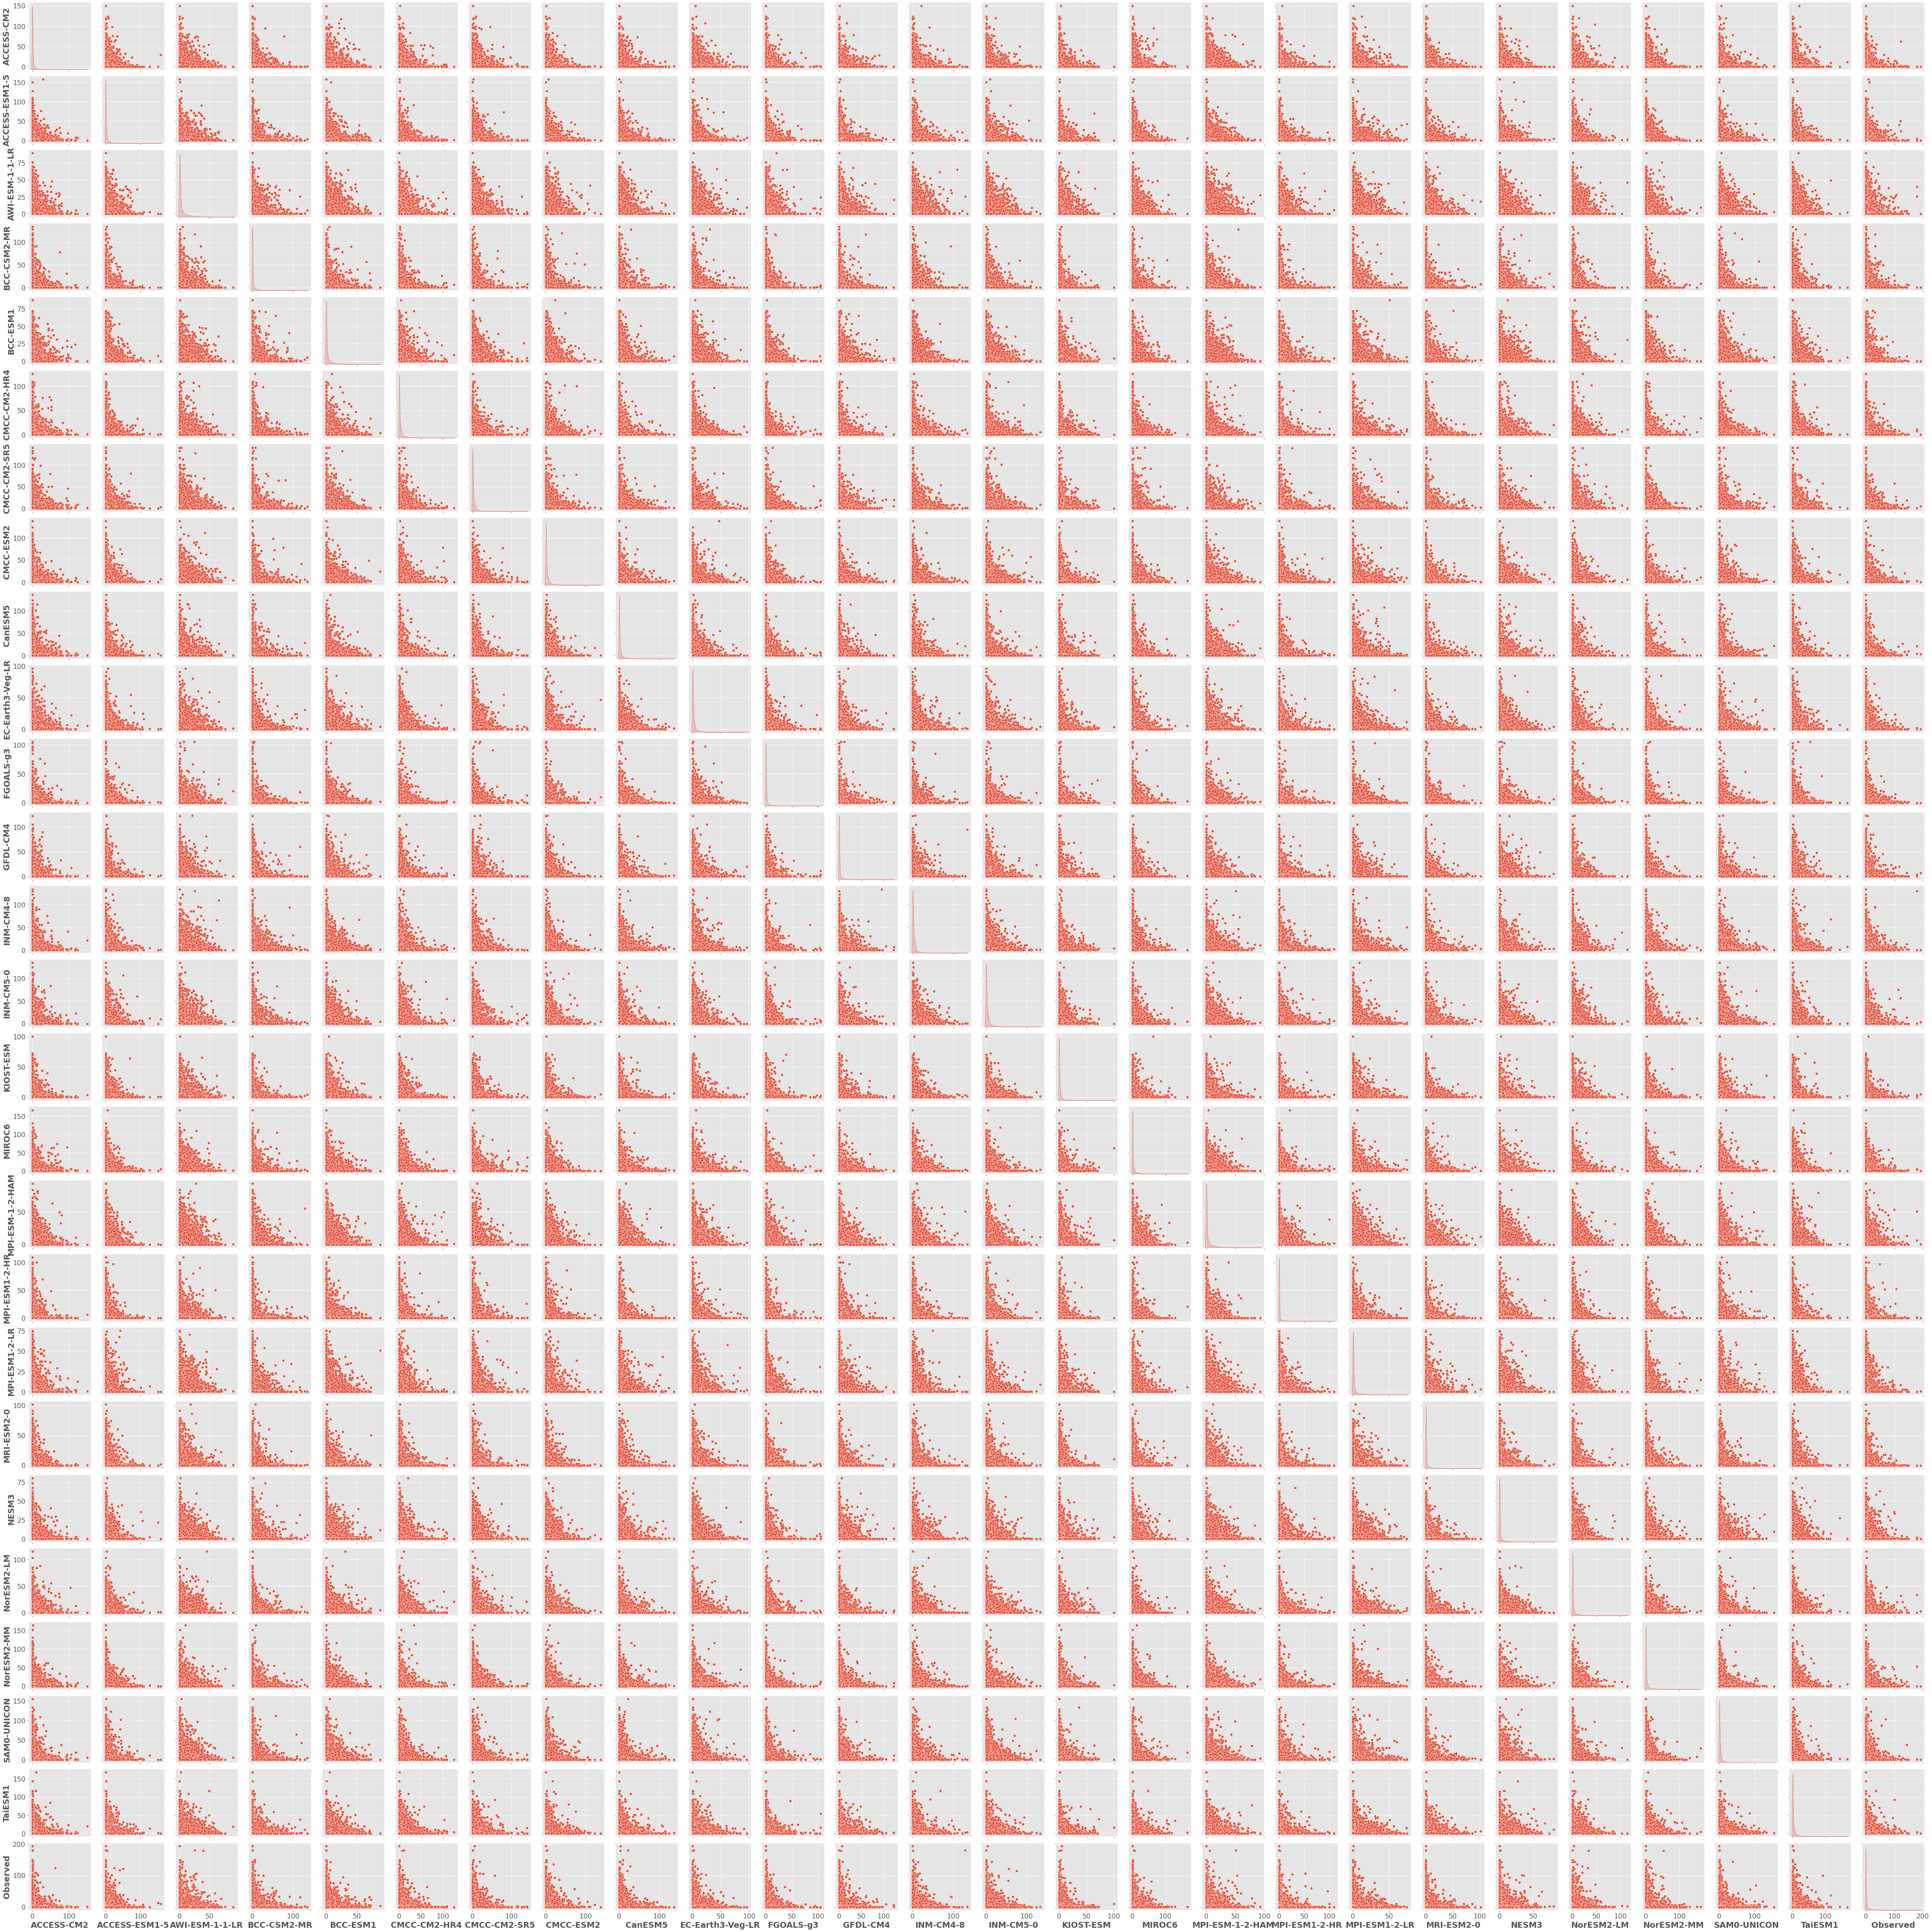

In [7]:
sns.pairplot(train_df, diag_kind="kde")
plt.show()

In [8]:
#Train ensemble(randomforest) model

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
#RMSE error 

results = {}
results['Ensemble'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
pd.DataFrame(results, index = ['RMSE']).T

RMSE
Ensemble  8.827097

In [10]:
#Comparing the RMSE with individaul model 
for col in X_test.columns:
    results[col] = mean_squared_error(y_test, X_test[col], squared=False)

pd.DataFrame(results, index = ['RMSE Score']).T

RMSE Score
Ensemble            8.827097
ACCESS-CM2         11.038999
ACCESS-ESM1-5      10.695305
AWI-ESM-1-1-LR     10.996616
BCC-CSM2-MR        10.761381
BCC-ESM1           10.615578
CMCC-CM2-HR4       10.643204
CMCC-CM2-SR5       11.480614
CMCC-ESM2          11.246493
CanESM5            11.151318
EC-Earth3-Veg-LR   10.453606
FGOALS-g3           9.687788
GFDL-CM4           10.511682
INM-CM4-8          11.451635
INM-CM5-0          12.250223
KIOST-ESM           9.600480
MIROC6             11.352976
MPI-ESM-1-2-HAM    10.932004
MPI-ESM1-2-HR       9.969823
MPI-ESM1-2-LR      10.260886
MRI-ESM2-0          9.922795
NESM3               9.978137
NorESM2-LM         10.410145
NorESM2-MM         10.939740
SAM0-UNICON        11.678749
TaiESM1            11.528083

According to the results above, the ensemble model has the lowest RMSE. Therefore, it performs better than other models. 

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [11]:
model = RandomForestRegressor(n_estimators= 100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [12]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.65


In [13]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***

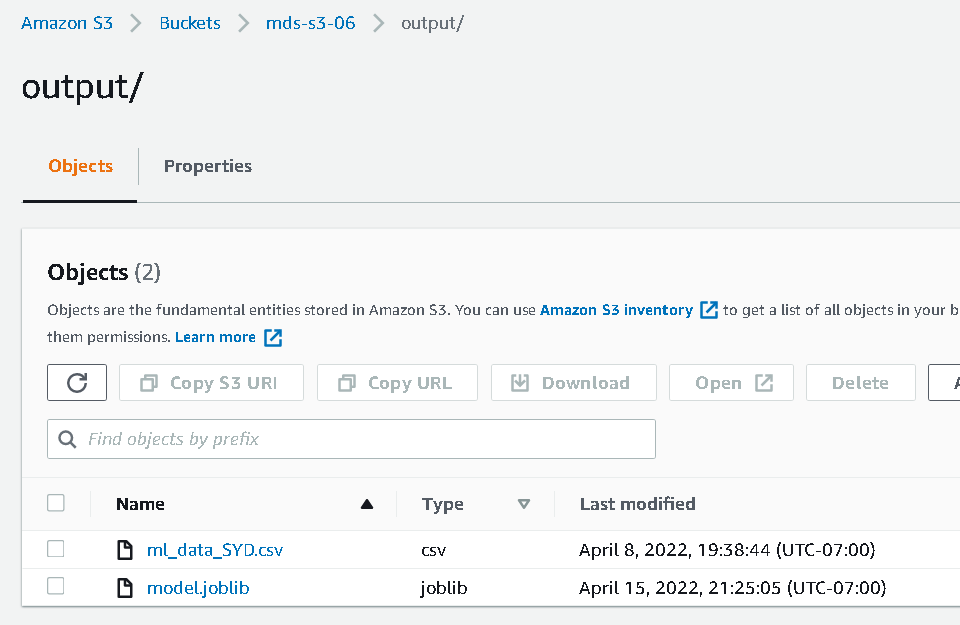